<a href="https://colab.research.google.com/github/armandordorica/APS1070_A4_Linear_Regression_Gradient_Descent/blob/master/Project_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 4, APS1070 Summer 2020
#### **Linear Regression -  20 points**
**Deadline: Aug 2, 23:00**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   Your **name**: Armando Ordorica
*   Your **student number**: 100 559 2164



## Part 1 - Getting Started [1 mark]

In this project, we are designing a controller to manage the ailerons of an F16 Aircraft! 
![Ailerons](https://raw.githubusercontent.com/aps1070-2019/datasets/master/img/airplane.gif) [Ref](https://www.grc.nasa.gov/www/k-12/BGA/Mike/airplane_parts_act.htm) 


The features describe the airplane's status, and the target is to predict the `Goal` column, which is a command that our controller should issue.

In [96]:
import pandas as pd
import numpy as np
df=pd.read_csv("https://raw.githubusercontent.com/aps1070-2019/datasets/master/F16L.csv" , skipinitialspace=True)

In [97]:
df.describe

<bound method NDFrame.describe of        inputs ClimbRate  Sgz     P     Q  ...  DiffSeTime14  Alpha     Se    Goal
0                   -17   -6 -0.03  0.14  ...           0.0    0.6  0.021 -0.0008
1                  -791   15 -0.28 -0.34  ...           0.0    0.4  0.013 -0.0009
2                   -46   48 -0.42  0.07  ...           0.0    0.5  0.019 -0.0005
3                   496   -5 -0.21 -0.04  ...           0.0    0.5  0.017 -0.0005
4                  -124   16 -0.02  0.05  ...           0.0    0.5  0.018 -0.0006
...                 ...  ...   ...   ...  ...           ...    ...    ...     ...
13745               -53  -13 -0.07  0.02  ...           0.0    0.5  0.019 -0.0007
13746                 1    4 -0.11 -0.07  ...           0.0    0.5  0.016 -0.0004
13747               425  -14  0.40  0.07  ...           0.0    0.9  0.032 -0.0015
13748               102  -10 -0.19  0.08  ...           0.0    1.4  0.051 -0.0015
13749              -165   52  0.08  0.42  ...           0.0    0

1. Split the dataset into training/validation sets (80% training, 20% validation). Note: While splitting use the value of **random state=41**.
2. Standardize the data using StandardScaler from sklearn.

In [98]:
df.columns

Index(['inputs ClimbRate', 'Sgz', 'P', 'Q', 'CurPitch', 'CurRoll', 'AbsRoll',
       'DiffClb', 'DiffRollRate', 'DiffDiffClb', 'SeTime1', 'SeTime2',
       'SeTime3', 'SeTime4', 'SeTime5', 'SeTime6', 'SeTime7', 'SeTime8',
       'SeTime9', 'SeTime10', 'SeTime11', 'SeTime12', 'SeTime13', 'SeTime14',
       'DiffSeTime1', 'DiffSeTime2', 'DiffSeTime3', 'DiffSeTime4',
       'DiffSeTime5', 'DiffSeTime6', 'DiffSeTime7', 'DiffSeTime8',
       'DiffSeTime9', 'DiffSeTime10', 'DiffSeTime11', 'DiffSeTime12',
       'DiffSeTime13', 'DiffSeTime14', 'Alpha', 'Se', 'Goal'],
      dtype='object')

In [99]:
cols = list(df.columns)
X_cols = cols[:-1]

X = df[X_cols]
y = df[cols[-1]]

import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=41)
X_train, X_test, y_train, y_test

(       inputs ClimbRate  Sgz     P  ...  DiffSeTime14  Alpha     Se
 1755                -38  -24 -0.20  ...           0.0    0.5  0.018
 11435                 3   16  0.43  ...           0.0    0.5  0.019
 6528                381   60  0.25  ...           0.0    0.6  0.022
 10868               -68  -23  0.48  ...           0.0    1.0  0.034
 2848                 86  -15  0.03  ...           0.0    1.4  0.049
 ...                 ...  ...   ...  ...           ...    ...    ...
 5200                452  -64  0.48  ...           0.0    0.5  0.017
 4066                -91  -20  0.06  ...           0.0    0.9  0.032
 12172                16   33  0.49  ...           0.0    0.7  0.025
 931                  19  -22 -0.21  ...           0.0    0.7  0.025
 1984                 33  -40 -0.02  ...           0.0    0.6  0.020
 
 [11000 rows x 40 columns],
       inputs ClimbRate  Sgz     P  ...  DiffSeTime14  Alpha     Se
 576                -39  -20 -0.04  ...           0.0    0.5  0.019
 3195 

**Standardizing the data**

In [100]:
from sklearn.preprocessing import StandardScaler

X_train_scaled = StandardScaler().fit_transform(X_train)
X_train_scaled_df = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_cols)

X_test_scaled = StandardScaler().fit_transform(X_test)
X_test_scaled_df = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_cols)

y_train_scaled = StandardScaler().fit_transform(np.array(y_train).reshape(-1,1))
y_train_scaled_df = pd.DataFrame(y_train_scaled, index=y_train.index, columns=['Goal'])

y_test_scaled = StandardScaler().fit_transform(np.array(y_test).reshape(-1,1))
y_test_scaled_df = pd.DataFrame(y_test_scaled, index=y_test.index, columns=['Goal'])


In [101]:
# np.array(y_train).reshape(-1,1)

In [102]:
# X_test_scaled_df

## Part 2 - Direct Solution [1 mark]

Implement the direct solution for linear regression on the dataset above (without regularizer).
Report training and validation error.

**Adding vector of 1s and adding it as the zeroth feature**

### **Casting the datasets to numpy arrays**

In [103]:
X_train_scaled_np = np.array(X_train_scaled_df)
X_test_scaled_np = np.array(X_test_scaled_df)


y_train_scaled_np = np.array(y_train_scaled_df).reshape(-1,1)
y_test_scaled_np = np.array(y_test_scaled_df).reshape(-1,1)

In [104]:
X.shape

(13750, 40)

* We have `N` training examples, `N=13750` in total. 
* We have `D` dimensions, `D=40` in total. 
* The weights are represented as a `D` dimensional vector `w` and the targets are represented as an `N` dimensional vector `t`. 

$$y = XW + b1$$

**We plug in the `scaled` and `np` versions of `X_train`, `X_test`, `Y_train` and `Y_test`.**
$$W= (X^TX)^{-1}X^Ty$$

In [105]:
y_train_scaled_np.T.shape

(1, 11000)

In [106]:
W = np.dot(np.linalg.inv(np.dot(X_train_scaled_np.T, X_train_scaled_np)), np.dot(X_train_scaled_np.T, y_train_scaled_np))
W = W.reshape(-1,1)
W.shape

(40, 1)

### **Based on the result we obtain for `W`, which is a (40,1) vector and multiply it with `X` as follows: $$X_{train}\cdot W = X_{train}^{T}W$$**

which yields a (11000,1) `y_pred_train_scaled_np` vector. 

In [107]:
X_train_scaled_np.shape

(11000, 40)

In [108]:
y_pred_train_scaled_np = np.dot(X_train_scaled_np, W)

In [109]:
y_train_scaled_np.shape, y_pred_train_scaled_np.shape

((11000, 1), (11000, 1))

In [110]:
np.arange(0, 11000)

array([    0,     1,     2, ..., 10997, 10998, 10999])

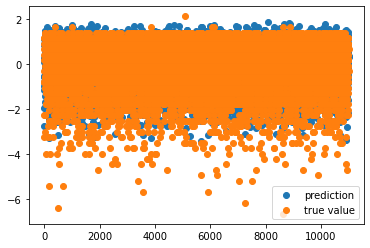

In [111]:
import matplotlib.pyplot as plt

plt.scatter(np.arange(0, 11000), y_pred_train_scaled_np, label='prediction')
plt.scatter(np.arange(0, 11000), y_train_scaled_np, label='true value')
plt.legend()

### **Comparing segments of the dataset to understand similarities between prediction and true value**

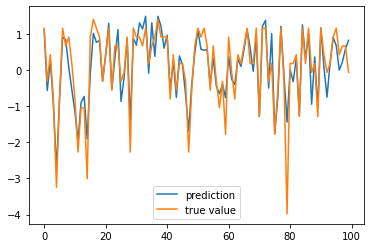

In [112]:
plt.plot(np.arange(0, 100), y_pred_train_scaled_np[0:100], label='prediction')
plt.plot(np.arange(0, 100), y_train_scaled_np[0:100], label='true value')
plt.legend()

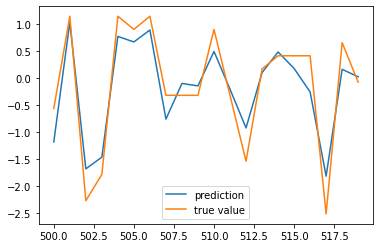

In [113]:
initial_value = 500
end_value = 520
plt.plot(np.arange(initial_value, end_value), y_pred_train_scaled_np[initial_value:end_value], label='prediction')
plt.plot(np.arange(initial_value, end_value), y_train_scaled_np[initial_value:end_value], label='true value')
plt.legend()

In [114]:
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

def rmse(yPred, y):
    return np.sqrt(mean_squared_error(yPred, y))

### **Training error**

In [115]:
print('RMSE: ', rmse(y_pred_train_scaled_np, y_train_scaled_np))
close_form_training_error = rmse(y_pred_train_scaled_np, y_train_scaled_np)

RMSE:  0.4307316495885256


### **Valudation error**

In [116]:
y_pred_test_scaled_np = np.dot(X_test_scaled_np, W)
close_form_validation_error =  rmse(y_pred_test_scaled_np, y_test_scaled_np)

print('RMSE: ', rmse(y_pred_test_scaled_np, y_test_scaled_np))

RMSE:  0.43909747182364917


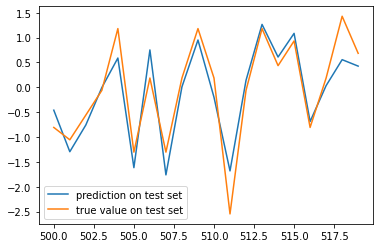

In [117]:
initial_value = 500
end_value = 520

plt.plot(np.arange(initial_value, end_value), y_pred_test_scaled_np[initial_value:end_value], label='prediction on test set')
plt.plot(np.arange(initial_value, end_value), y_test_scaled_np[initial_value:end_value], label='true value on test set')
plt.legend()

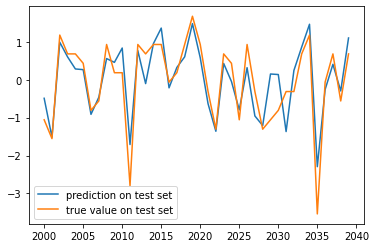

In [118]:
initial_value = 2000
end_value = 2040

plt.plot(np.arange(initial_value, end_value), y_pred_test_scaled_np[initial_value:end_value], label='prediction on test set')
plt.plot(np.arange(initial_value, end_value), y_test_scaled_np[initial_value:end_value], label='true value on test set')
plt.legend()

## Part 3 - Gradient Descent (GD) [2 marks]

1. Implement gradient descent (full-batch) for linear regression using a fixed learning rate of $\alpha= 1e-2$. You should compute the gradients yourself! First try to implement it without looking at other resources, but if you need a hint take a look [here](https://towardsdatascience.com/gradient-descent-explanation-implementation-c74005ff7dd1) and [here](https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html).

2. Run the gradient descent for a fixed number of epochs (based on convergence) and verify that the results are closely approximate the direct solution.

$$y = Xw +b1$$
where `1` represents a vector of ones. 

* The gradient descent update rule can be vectorized as follows: 

$$w \leftarrow w - \frac{\alpha}{N}X^T(y-t)$$

Where $\alpha$ is the learning rate. 

We initialize the wrights to some value (e.g. all zeros), and repeatedly adjust them in the direction that most decreases the cost function. 
* The entries of the gradient vector are simply the partial derivatives with respect to each of the variables. 
* To decrease a function as quickly as possible, we should update the parameters in the direction opposite to the gradient. 
* The following update rule is known as **gradient descent**: 
$$w \leftarrow w - \alpha \frac{\partial J}{\partial w_j}$$
* We write one function that computes the derivative and another function that implements the gradient descent. 


**1. We initialize `w` to be a vector of zeros and `b` to be a vector of `1`s**

* NOTE: Actually, because our data is already scaled and centered at zero, we will ignore the bias term by adding "zeros" because otherwise the RMSE asymptotes at 1. 

In [119]:
w_init_grad_desc = np.zeros((40,1))
b = np.zeros((11000,1))
alpha = 0.001
N = 11000
rmses_gd = []

**2. We obtain `y_gd_pred_scaled_np`, where `gd` stands for "gradient descent" by `y_gd_pred_scaled_np`= `X_train_scaled_np` $\cdot$ `w_init_grad_desc` + `b`**

In [120]:
y_gd_pred_train_scaled_np = np.dot(X_train_scaled_np, w_init_grad_desc) + b

**At the beginning it's simply a vector of `1`s**

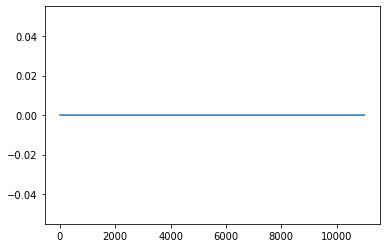

In [121]:
plt.plot(y_gd_pred_train_scaled_np)

In [122]:
rmse(y_gd_pred_train_scaled_np, y_train_scaled_np)

1.0

**Now we update the weight vector using the update rule $$w \leftarrow w - \frac{\alpha}{N}X^T(y-t)$$**

In [123]:
w_init_grad_desc = w_init_grad_desc - alpha/N * np.dot(X_train_scaled_np.T,(y_gd_pred_train_scaled_np-y_train_scaled_np))

**After we apply the update rule, we try `y` again and check for the `RMSE` value that it yields**

In [124]:
y_gd_pred_train_scaled_np = np.dot(X_train_scaled_np, w_init_grad_desc) + b
rmses_gd.append(rmse(y_gd_pred_train_scaled_np, y_train_scaled_np))

**At t=2**


In [125]:
for i in range(0,10000): 
  w_init_grad_desc = w_init_grad_desc - alpha/N * np.dot(X_train_scaled_np.T,(y_gd_pred_train_scaled_np-y_train_scaled_np))
  y_gd_pred_train_scaled_np = np.dot(X_train_scaled_np, w_init_grad_desc) + b
  rmse_loss = rmse(y_gd_pred_train_scaled_np, y_train_scaled_np)
  rmses_gd.append(rmse_loss)

Text(0.5, 1.0, 'RMSE Loss')

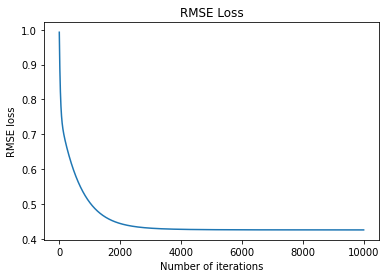

In [126]:
plt.plot(rmses_gd)
plt.xlabel("Number of iterations")
plt.ylabel("RMSE loss")
plt.title("RMSE Loss")

In [127]:
rmse(y_gd_pred_train_scaled_np, y_train_scaled_np)

0.42566746996276966

In [128]:
print("Minimum RMSE loss after 10000 iterations is :{}".format(rmses_gd[-1]))

Minimum RMSE loss after 10000 iterations is :0.42566746996276966


### **Showing how predicted and true values compare for the training set for random segments**

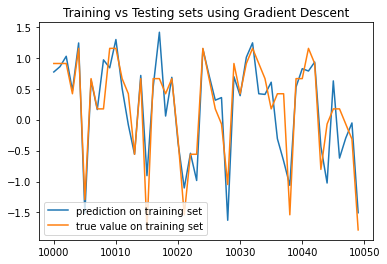

In [129]:
initial_value = 10000
end_value = 10050

plt.plot(np.arange(initial_value, end_value), y_gd_pred_train_scaled_np[initial_value:end_value], label='prediction on training set')
plt.plot(np.arange(initial_value, end_value), y_train_scaled_np[initial_value:end_value], label='true value on training set')
plt.title("Training vs Testing sets using Gradient Descent")
plt.legend()

**We will compute the loss on the testing set by multiplying the fitted weight vector with the `X_train` set.**

In [130]:
y_gd_pred_test_scaled_np = np.dot(X_test_scaled_np, w_init_grad_desc)
rmse(y_gd_pred_test_scaled_np, y_test_scaled_np)

0.42839716035487174

In [131]:
print("training error:{}".format(rmse(y_gd_pred_train_scaled_np, y_train_scaled_np)))
print("testing error:{}".format(rmse(y_gd_pred_test_scaled_np, y_test_scaled_np)))

training error:0.42566746996276966
testing error:0.42839716035487174


In [132]:
print("close form training error:{}".format(close_form_training_error))
print("close form testing error:{}".format(close_form_validation_error))

close form training error:0.4307316495885256
close form testing error:0.43909747182364917


### **We obtain very similar error using gradient descent versus direct solution**

## Part 4 - Mini-batch and Stochastic Gradient Descent [3 marks]

When B=1, we call that stochastic gradient descent.  When B=#train data points, it is full-batch (ie all data points are used, every cycle). Anywhere in between is mini-batch (we use some of the data).  

1. Implement Mini-batch Gradient Descent. 
First try to implement it without looking at other resources, but if you need a hint take a look [here](https://towardsdatascience.com/gradient-descent-explanation-implementation-c74005ff7dd1) and [here](https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html).

2. Sweep different values for the mini-batch size (including 1 -- Stochastic GD) with a fixed learning rate and report your findings on a plot (training error and validation error vs. iterations).

* $\theta$ **refers to the network's parameters, which will contain all of the network's weights and biases.**
* $\epsilon$ **represents the cost function**
* Combinations of network's parameters from $\theta$ map to a specific point on the $\epsilon$ space (cost surface). 


**Mini-batch gradient descent**
* Compute the gradient and average it over a batch of $B$ training examples, typically on the order of 100. 
* Number of operations required to compute the gradient for a mini-batch is linear in the size of the mini-batch, since mathematically, the gradient for each training example is a separate computation. 
* If all operations were equally expensive, one would always prefere to use B=1. 

**Why do we use $B>1$?**
* Operations in mini-batches can be vectorized by writing them in terms of matrix operations. This reduces interpreter overhead and makes use of efficient and carefully tuned linear algebra libraries. 
* We can exploit parallelism on GPUs when B is large, since the gradients can be computed independently for each training example. 

* Set $B=100$ and let's split our original `X` and `Y` into minibatches of size 100. 
* Since we have 11,000 training examples, we will have 110 mini batches that will come into mini-batch pairs denoted by: 
$$minibatch_t= (X^{\{t\}}, Y^{\{t\}})$$
* Therefore, all our minibatches $X^{\{t\}}$ will have dimensions $D \times B = 40 \times 11,000$



### **Initializing our hyperparameters**

In [133]:
w_init_grad_desc = np.zeros((40,1))
b = np.zeros((11000,1))
alpha = 0.001
N = 11000
rmses_gd = []
B = 100
num_minibatches = len(X_train_scaled_df)//B
print("HYPER PARAMETERS")
print("alpha:{}".format(alpha))
print("Num of training examples = N:{}".format(N))
print("Mini batch size = B:{}".format(B))
print("Num of mini batches = num_minibatches:{}".format(num_minibatches))

HYPER PARAMETERS
alpha:0.001
Num of training examples = N:11000
Mini batch size = B:100
Num of mini batches = num_minibatches:110


**Creating list of minibatches for X_train_scaled_df**

In [134]:
X_train_scaled_df.reset_index(inplace=True)
X_train_scaled_df.drop(columns=['index'], inplace=True)

y_train_scaled_df.reset_index(inplace=True)
y_train_scaled_df.drop(columns=['index'], inplace=True)

j = 0
X_train_scaled_minibatches_df=[]
y_train_scaled_minibatches_df=[]
for i in range(0, num_minibatches):
  X_train_scaled_minibatches_df.append(X_train_scaled_df.iloc[j: j+100])
  y_train_scaled_minibatches_df.append(y_train_scaled_df.iloc[j: j+100])
  j=j+B

### **Casting mini batches to numpy arrays**

In [135]:
j = 0
X_train_scaled_minibatches_np=[]
y_train_scaled_minibatches_np=[]
for i in range(0, num_minibatches):
  X_train_scaled_minibatches_np.append(np.array(X_train_scaled_df.iloc[j: j+100]))
  y_train_scaled_minibatches_np.append(np.array(y_train_scaled_df.iloc[j: j+100]))
  j=j+B

**Running the same vectorized forward propagation algorithm with weight update rule but on minibatches instead**

In [136]:
w_init_minibatch = np.zeros((40,1))
rmses_minibatches = []
num_epochs = 100

for i in range(0, num_epochs): 
  rmses_minibatch = []
  for t in range(0, num_minibatches): 
    y_minibatch_pred_train_scaled_np = np.dot(X_train_scaled_minibatches_np[t], w_init_minibatch)
    w_init_minibatch = w_init_minibatch - alpha/B * np.dot(X_train_scaled_minibatches_np[t].T,(y_minibatch_pred_train_scaled_np-y_train_scaled_minibatches_np[t]))
    rmse_loss = rmse(y_train_scaled_minibatches_np[t], y_minibatch_pred_train_scaled_np)
    rmses_minibatch.append(rmse_loss)
  rmses_minibatches.append(np.mean(rmses_minibatch))
  

Text(0.5, 0, 'Number of epochs')

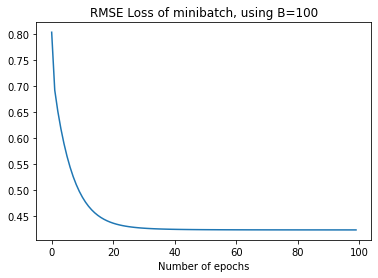

In [137]:
plt.plot(rmses_minibatches)
plt.title("RMSE Loss of minibatch, using B={}".format(B))
plt.xlabel("Number of epochs")

### **Determining convergence**
* We can declare convergence if the cost function decreases by less than $10^{-3}$ in one iteration

In [138]:
i = 0
while i< len(rmses_minibatches): 
  if rmses_minibatches[i]-rmses_minibatches[i+1] < 0.001: 
    print("Number of epochs to converge: {}".format(i))
    break 
  i+=1
epochs_to_converge = i

Number of epochs to converge: 24


###**Evaluating results on Test data**

In [139]:
y_minibatch_pred_train_scaled_np = np.dot(X_train_scaled_np, w_init_minibatch)
y_minibatch_pred_test_scaled_np = np.dot(X_test_scaled_np, w_init_minibatch)

rmse_minibatch_train = rmse(y_train_scaled_np, y_minibatch_pred_train_scaled_np)
rmse_minibatch_test = rmse(y_test_scaled_np, y_minibatch_pred_test_scaled_np)

print("training error:{}".format(rmse_minibatch_train))
print("testing error:{}".format(rmse_minibatch_test))

training error:0.4256581490655238
testing error:0.4285845584402317


In [140]:
d = {'alpha':[alpha], 'Mini Batch Size B':[B], 'num_minibatches':[num_minibatches],'epochs_to_converge': [epochs_to_converge], 'rmse_minibatch_train':[rmse_minibatch_train], 
     'rmse_minibatch_test':[rmse_minibatch_test]}
df = pd.DataFrame(data=d) 


### **Trying Different Values of B**

INITALIZING PARAMETERS...
HYPER PARAMETERS
alpha:0.001
Num of training examples = N:11000
Mini batch size = B:100
Num of mini batches = num_minibatches:110


Creating list of minibatches for X_train_scaled_df

 Casting mini batches to numpy arrays

 Running the same vectorized forward propagation algorithm with weight update rule but on minibatches instead

 Evaluating results on Test data
training error:0.4253683274948885
testing error:0.4281897239664606

 Determining convergence
Number of epochs to converge: 24
INITALIZING PARAMETERS...
HYPER PARAMETERS
alpha:0.001
Num of training examples = N:11000
Mini batch size = B:500
Num of mini batches = num_minibatches:22


Creating list of minibatches for X_train_scaled_df

 Casting mini batches to numpy arrays

 Running the same vectorized forward propagation algorithm with weight update rule but on minibatches instead

 Evaluating results on Test data
training error:0.42554097624154474
testing error:0.42821638910928195

 Determining conver

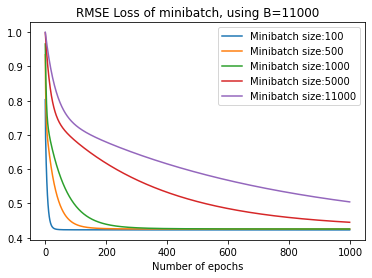

In [141]:
Bs = [100, 500, 1000, 5000, 11000]
for B in Bs: 
  print("INITALIZING PARAMETERS...")
  w_init_grad_desc = np.zeros((40,1))
  b = np.zeros((11000,1))
  alpha = 0.001
  N = 11000
  num_epochs = 1000
  rmses_gd = []
  # B = 100
  num_minibatches = len(X_train_scaled_df)//B
  print("HYPER PARAMETERS")
  print("alpha:{}".format(alpha))
  print("Num of training examples = N:{}".format(N))
  print("Mini batch size = B:{}".format(B))
  print("Num of mini batches = num_minibatches:{}".format(num_minibatches))
  print("\n")


  print("Creating list of minibatches for X_train_scaled_df")
  X_train_scaled_df.reset_index(inplace=True)
  X_train_scaled_df.drop(columns=['index'], inplace=True)

  y_train_scaled_df.reset_index(inplace=True)
  y_train_scaled_df.drop(columns=['index'], inplace=True)

  j = 0
  X_train_scaled_minibatches_df=[]
  y_train_scaled_minibatches_df=[]
  for i in range(0, num_minibatches):
    X_train_scaled_minibatches_df.append(X_train_scaled_df.iloc[j: j+B])
    y_train_scaled_minibatches_df.append(y_train_scaled_df.iloc[j: j+B])
    j=j+B


  print("\n Casting mini batches to numpy arrays")
  j = 0
  X_train_scaled_minibatches_np=[]
  y_train_scaled_minibatches_np=[]
  for i in range(0, num_minibatches):
    X_train_scaled_minibatches_np.append(np.array(X_train_scaled_df.iloc[j: j+B]))
    y_train_scaled_minibatches_np.append(np.array(y_train_scaled_df.iloc[j: j+B]))
    j=j+B


  print("\n Running the same vectorized forward propagation algorithm with weight update rule but on minibatches instead")
  w_init_minibatch = np.zeros((40,1))
  rmses_minibatches = []
  

  for i in range(0, num_epochs): 
    rmses_minibatch = []
    for t in range(0, num_minibatches): 
      y_minibatch_pred_train_scaled_np = np.dot(X_train_scaled_minibatches_np[t], w_init_minibatch)
      w_init_minibatch = w_init_minibatch - alpha/B * np.dot(X_train_scaled_minibatches_np[t].T,(y_minibatch_pred_train_scaled_np-y_train_scaled_minibatches_np[t]))
      rmse_loss = rmse(y_train_scaled_minibatches_np[t], y_minibatch_pred_train_scaled_np)
      rmses_minibatch.append(rmse_loss)
    rmses_minibatches.append(np.mean(rmses_minibatch))


  plt.plot(rmses_minibatches, label='Minibatch size:{}'.format(B))
  plt.title("RMSE Loss of minibatch, using B={}".format(B))
  plt.xlabel("Number of epochs")
  plt.legend()

  print("\n Evaluating results on Test data")
  y_minibatch_pred_train_scaled_np = np.dot(X_train_scaled_np, w_init_minibatch)
  y_minibatch_pred_test_scaled_np = np.dot(X_test_scaled_np, w_init_minibatch)

  rmse_minibatch_train = rmse(y_train_scaled_np, y_minibatch_pred_train_scaled_np)
  rmse_minibatch_test = rmse(y_test_scaled_np, y_minibatch_pred_test_scaled_np)

  print("training error:{}".format(rmse_minibatch_train))
  print("testing error:{}".format(rmse_minibatch_test))

  print('\n Determining convergence')
  i = 0
  while i< len(rmses_minibatches)-1: 
    if rmses_minibatches[i]-rmses_minibatches[i+1] < 0.001: 
      print("Number of epochs to converge: {}".format(i))
      break 
    i+=1
  epochs_to_converge = i

  d1 = {'alpha':[alpha], 'Mini Batch Size B':[B], 'num_minibatches':[num_minibatches],'epochs_to_converge': [epochs_to_converge], 'rmse_minibatch_train':[rmse_minibatch_train], 
     'rmse_minibatch_test':[rmse_minibatch_test]}
  df1 = pd.DataFrame(data=d1) 

  df = df.append(df1)
  df
    

### **Results Summary for Mini Batch Size Calibration**

We can see that the fastest convergence occured for `B=100`, with 24 epochs to converge. 

In [142]:
df_part3 = df
df_part3 

,alpha,Mini Batch Size B,num_minibatches,epochs_to_converge,rmse_minibatch_train,rmse_minibatch_test
0,0.001,100,110,24,0.425658,0.428585
0,0.001,100,110,24,0.425368,0.428190
0,0.001,500,22,73,0.425541,0.428216
0,0.001,1000,11,106,0.425648,0.428372
0,0.001,5000,2,68,0.443675,0.446063
0,0.001,11000,1,83,0.504461,0.504452


## Part 5 - Learning Rate [2 marks]
Select the best batch size based on fastest convergence (number of times you update the weights) and sweep the learning rate while applying Mini-batch GD. Report your findings on a plot.


INITALIZING PARAMETERS...
HYPER PARAMETERS
alpha:0.01
Num of training examples = N:11000
Mini batch size = B:100
Num of mini batches = num_minibatches:110


Creating list of minibatches for X_train_scaled_df

Casting mini batches to numpy arrays

Running the same vectorized forward propagation algorithm with weight update rule but on minibatches instead

Evaluating results on Test data
training error:0.42533216489092024
testing error:0.4275311513347331

Determining convergence
Number of epochs to converge: 4
INITALIZING PARAMETERS...
HYPER PARAMETERS
alpha:0.001
Num of training examples = N:11000
Mini batch size = B:100
Num of mini batches = num_minibatches:110


Creating list of minibatches for X_train_scaled_df

Casting mini batches to numpy arrays

Running the same vectorized forward propagation algorithm with weight update rule but on minibatches instead

Evaluating results on Test data
training error:0.4253683274948885
testing error:0.4281897239664606

Determining convergence
Numb

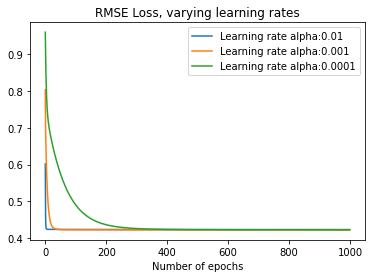

In [143]:
alphas = [0.01, 0.001, 0.0001]
for alpha in alphas: 
  print("INITALIZING PARAMETERS...")
  w_init_grad_desc = np.zeros((40,1))
  b = np.zeros((11000,1))
  # alpha = 0.001
  N = 11000
  num_epochs = 1000
  rmses_gd = []
  B = 100
  num_minibatches = len(X_train_scaled_df)//B
  print("HYPER PARAMETERS")
  print("alpha:{}".format(alpha))
  print("Num of training examples = N:{}".format(N))
  print("Mini batch size = B:{}".format(B))
  print("Num of mini batches = num_minibatches:{}".format(num_minibatches))
  print("\n")


  print("Creating list of minibatches for X_train_scaled_df")
  X_train_scaled_df.reset_index(inplace=True)
  X_train_scaled_df.drop(columns=['index'], inplace=True)

  y_train_scaled_df.reset_index(inplace=True)
  y_train_scaled_df.drop(columns=['index'], inplace=True)

  j = 0
  X_train_scaled_minibatches_df=[]
  y_train_scaled_minibatches_df=[]
  for i in range(0, num_minibatches):
    X_train_scaled_minibatches_df.append(X_train_scaled_df.iloc[j: j+B])
    y_train_scaled_minibatches_df.append(y_train_scaled_df.iloc[j: j+B])
    j=j+B


  print("\nCasting mini batches to numpy arrays")
  j = 0
  X_train_scaled_minibatches_np=[]
  y_train_scaled_minibatches_np=[]
  for i in range(0, num_minibatches):
    X_train_scaled_minibatches_np.append(np.array(X_train_scaled_df.iloc[j: j+B]))
    y_train_scaled_minibatches_np.append(np.array(y_train_scaled_df.iloc[j: j+B]))
    j=j+B


  print("\nRunning the same vectorized forward propagation algorithm with weight update rule but on minibatches instead")
  w_init_minibatch = np.zeros((40,1))
  rmses_minibatches = []
  

  for i in range(0, num_epochs): 
    rmses_minibatch = []
    for t in range(0, num_minibatches): 
      y_minibatch_pred_train_scaled_np = np.dot(X_train_scaled_minibatches_np[t], w_init_minibatch)
      w_init_minibatch = w_init_minibatch - alpha/B * np.dot(X_train_scaled_minibatches_np[t].T,(y_minibatch_pred_train_scaled_np-y_train_scaled_minibatches_np[t]))
      rmse_loss = rmse(y_train_scaled_minibatches_np[t], y_minibatch_pred_train_scaled_np)
      rmses_minibatch.append(rmse_loss)
    rmses_minibatches.append(np.mean(rmses_minibatch))


  plt.plot(rmses_minibatches, label='Learning rate alpha:{}'.format(alpha))
  plt.title("RMSE Loss, varying learning rates")
  plt.xlabel("Number of epochs")
  plt.legend()

  print("\nEvaluating results on Test data")
  y_minibatch_pred_train_scaled_np = np.dot(X_train_scaled_np, w_init_minibatch)
  y_minibatch_pred_test_scaled_np = np.dot(X_test_scaled_np, w_init_minibatch)

  rmse_minibatch_train = rmse(y_train_scaled_np, y_minibatch_pred_train_scaled_np)
  rmse_minibatch_test = rmse(y_test_scaled_np, y_minibatch_pred_test_scaled_np)

  print("training error:{}".format(rmse_minibatch_train))
  print("testing error:{}".format(rmse_minibatch_test))

  print('\nDetermining convergence')
  i = 0
  while i< len(rmses_minibatches)-1: 
    if rmses_minibatches[i]-rmses_minibatches[i+1] < 0.001: 
      print("Number of epochs to converge: {}".format(i))
      break 
    i+=1
  epochs_to_converge = i

  d1 = {'alpha':[alpha], 'Mini Batch Size B':[B], 'num_minibatches':[num_minibatches],'epochs_to_converge': [epochs_to_converge], 'rmse_minibatch_train':[rmse_minibatch_train], 
     'rmse_minibatch_test':[rmse_minibatch_test]}
  df1 = pd.DataFrame(data=d1) 

  df = df.append(df1)
  df
    

**We can see that the fastest convergence was attained with `alpha=0.01`**

### Summary of performance of different learning rates

In [144]:
df_part4 = df
df_part4

,alpha,Mini Batch Size B,num_minibatches,epochs_to_converge,rmse_minibatch_train,rmse_minibatch_test
0,0.0010,100,110,24,0.425658,0.428585
0,0.0010,100,110,24,0.425368,0.428190
0,0.0010,500,22,73,0.425541,0.428216
0,0.0010,1000,11,106,0.425648,0.428372
0,0.0010,5000,2,68,0.443675,0.446063
0,0.0010,11000,1,83,0.504461,0.504452
0,0.0100,100,110,4,0.425332,0.427531
0,0.0010,100,110,24,0.425368,0.428190
0,0.0001,100,110,106,0.425648,0.428369


## Part 6 - Regularizers [4 marks]

1.   Formula (use a text cell --markdown-- and write in latex): 
  *   Derive the Direct solution formula when a L1 regularizer ($\lambda_1$) is employed. - in progress
  *   Derive the Direct solution formula when a L2 regularizer ($\lambda_2$) is employed. - done 
  *   Derive the Gradient Descent weight update formula when the L1 regularizer is employed. - done 
  *   Derive the Gradient Descent weight update formula when the L2 regularizer is employed. - done



2.   Evaluation:

  *  Apply L1 and L2 regularizers (separately) to the direct solution and plot train and validation error as a function of the $\lambda$. Find the best regularizer ($\lambda$) values to use in the next steps.

    *   Plot mini-batch GD train error and validation error when $\lambda_1$ regularizer is employed. (X-axis: iterations)

    *   Plot mini-batch GD train error and validation error when $\lambda_2$ regularizer is employed. (X-axis: iterations)



* Summarize your findings and explain whether L1 or L2 regularizers are helping the GD convergence. Is it always safe to use a L1 regularizer? How about L2?



Regularizers penalize hypotheses we think are somehow pathological and unlikely to generalize well. 

### **$L_1$ Regularization**
L1 Regularization is also known as LASSO (Least Absolute Selection and Shrinkage Operator). 
* It is good for high dimensional problems. 
* L1 regularization has many of the beneficial properties of $L_2$ regularization, but yields sparse models that are more easily interpreted. 
* Models produced under an L1 penalty often outperform those produced with an $L_2$ penalty when irrelevant features are present in X. 


$$R = \sum_i |w_i| $$

$$J_{LASSO}(\theta)=J(\theta) + \lambda ||\theta||_1$$
$$= \frac{1}{2}\sum_{i=1}^{N}(\theta^{T}x^{(i)}-y^{(i)})^2 + \lambda \sum_{k=1}^{K} |\theta_{k}|$$

### **$L_2$ Regularization**
L2 Regularization is also known as Ridge Regression. 
* We encourage weights to be small by choosing as our regularizer the $L_2$ penalty. 
* We want to do this to reduce the potential numerical instability introduced by weights with large magnitudes. 

$$R = \sum_i w_i^2 $$

$$J_{RR}(\theta)=J(\theta) + \lambda ||\theta||_2^2$$
$$= \frac{1}{2}\sum_{i=1}^{N}(\theta^{T}x^{(i)}-y^{(i)})^2 + \lambda \sum_{k=1}^{K} \theta_{k}^2$$



### **Direct Solution WITHOUT regularization**
$$y = XW + b1$$

$$W= (X^TX)^{-1}X^Ty$$


### **Direct Solution WITH $L_1$ regularization**
$$y = XW + b1$$

We get the expression: 

$$||Xw - y||^2_2 +\lambda||w||_1$$

* Note that this remains an unconstrained convex optimization problem in terms of $w$. However, this problem is now non-differentiable when $w_i=0$ for any $w_i$. Thus, we cannot obtain a closed form solution for the global minimum in the same way that it is done with the $L_2$ penalty. 


### **Direct Solution WITH $L_2$ regularization**
$$y = XW + b1$$

$$W= (X^TX +\lambda I)^{-1}X^Ty$$


 <hr>

### **Gradient descent update rule WITHOUT regularization**
$$w \leftarrow w - \alpha \frac{\partial J}{\partial w_j}$$


### **Gradient descent update rule WITH $L_1$ regularization**
The update equation for each feature $i$ is as follows: 
$$w_i^{k+1} = w_i^k+\alpha_k \frac{\partial}{\partial w_i} \left( L(j, w) - \frac{C}{N} |w_i|\right)$$

where:
* $i$ represents the $i$th feature
* $N$ is the batch size 
* $k$ is the iteration counter 
* $\alpha_k$ is the learning rate 
* $C$ is the metaparameter that controls the degree of regularization, which is usually tuned by cross-validation or using the heldout deta
* $L(j,w)$ denotes the conditional log-likelihood of each sample $log_p(y_j|x_j;w)$

Ref: https://www.aclweb.org/anthology/P09-1054.pdf


### **Gradient descent update rule WITH $L_2$ regularization**
$$w \leftarrow w - \alpha \left( \frac{\partial J}{\partial w_j} +\lambda \frac{\partial R}{\partial w}\right)$$

$$= w - \alpha \left( \frac{\partial J}{\partial w_j} +\lambda w \right) $$

$$= (1- \alpha \lambda) w - \alpha \left( \frac{\partial J}{\partial w} \right) $$


$L_2$ regularization cost: 

$$J(w) = \frac{1}{2N}\left[\sum_{i=1}^N(h_w(x^{(i)})-t^{(i)})^2 +\lambda \sum_{j=1}^{n}w_j^2 \right]$$


Ref: https://www.cs.ubc.ca/~schmidtm/Documents/2005_Notes_Lasso.pdf





* We have `N` training examples, `N=13750` in total. 
* We have `D` dimensions, `D=40` in total. 
* The weights are represented as a `D` dimensional vector `w` and the targets are represented as an `N` dimensional vector `t`. 

$$y = XW + b1$$

**We plug in the `scaled` and `np` versions of `X_train`, `X_test`, `Y_train` and `Y_test`.**
$$W= (X^TX)^{-1}X^Ty$$

### Direct solution without regularization

In [145]:
W = np.dot(np.linalg.inv(np.dot(X_train_scaled_np.T, X_train_scaled_np)), np.dot(X_train_scaled_np.T, y_train_scaled_np))
W = W.reshape(-1,1)
W.shape

y_pred_train_scaled_np = np.dot(X_train_scaled_np, W)

In [146]:
print('RMSE: ', rmse(y_pred_train_scaled_np, y_train_scaled_np))
close_form_training_error = rmse(y_pred_train_scaled_np, y_train_scaled_np)

RMSE:  0.4307316495885256


In [147]:
y_pred_test_scaled_np = np.dot(X_test_scaled_np, W)
close_form_validation_error =  rmse(y_pred_test_scaled_np, y_test_scaled_np)

print('RMSE: ', rmse(y_pred_test_scaled_np, y_test_scaled_np))

RMSE:  0.43909747182364917


In [224]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [225]:
n = 50 #number of points 
w = 2 # slope of the line 
b = 4 # y intercept of the line 
r = 2 # range of data on x axis

np.random.seed(2)
x = r *np.random.rand(n)
x.sort()

yPerf = w*x + b
y = w*x +b+0.2* np.random.randn(n)

### Direct solution WITH L2 regularization
$$y = XW + b1$$

$$W= (X^TX +\lambda I)^{-1}X^Ty$$

In [148]:
W = np.dot(np.linalg.inv(np.dot(X_train_scaled_np.T, X_train_scaled_np)), np.dot(X_train_scaled_np.T, y_train_scaled_np))
W = W.reshape(-1,1)
W.shape

y_pred_train_scaled_np = np.dot(X_train_scaled_np, W)

print('RMSE: ', rmse(y_pred_train_scaled_np, y_train_scaled_np))
close_form_training_error = rmse(y_pred_train_scaled_np, y_train_scaled_np)

y_pred_test_scaled_np = np.dot(X_test_scaled_np, W)
close_form_validation_error =  rmse(y_pred_test_scaled_np, y_test_scaled_np)

print('RMSE: ', rmse(y_pred_test_scaled_np, y_test_scaled_np))


RMSE:  0.4307316495885256
RMSE:  0.43909747182364917


In [149]:
identity_size = np.dot(X_train_scaled_np.T, X_train_scaled_np).shape[0]

In [150]:
lambdas_to_try = np.arange(0,1, 0.01)
training_errors= []
validation_errors = []

for lambda_ in lambdas_to_try: 
# lambda_ = 1
  lambda_identity = np.identity(identity_size) *lambda_


  W = np.dot(np.linalg.inv(np.dot(X_train_scaled_np.T, X_train_scaled_np) + lambda_identity),  np.dot(X_train_scaled_np.T, y_train_scaled_np))
  W = W.reshape(-1,1)
  W.shape

  y_pred_train_scaled_np = np.dot(X_train_scaled_np, W)
  close_form_training_error = rmse(y_pred_train_scaled_np, y_train_scaled_np)
  training_errors.append(close_form_training_error)

  y_pred_test_scaled_np = np.dot(X_test_scaled_np, W)
  close_form_validation_error =  rmse(y_pred_test_scaled_np, y_test_scaled_np)
  validation_errors.append(close_form_validation_error)


In [151]:
lambdas_to_try

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

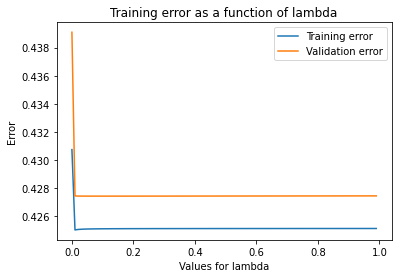

In [152]:
plt.plot(lambdas_to_try, training_errors, label='Training error')
plt.plot(lambdas_to_try, validation_errors, label='Validation error')
plt.xlabel("Values for lambda")
plt.ylabel("Error")
plt.title("Training error as a function of lambda")
plt.legend()

## Part 7 - Introducing Momentum [4 marks]

Momentum is a popular technique that helps the gradient descent algorithm to converge faster. Simply, it behaves like a moving average of gradients. First, take a look at [here](https://towardsdatascience.com/stochastic-gradient-descent-with-momentum-a84097641a5d) to get familiar with the concept.

To summarize, If the weight update formula in the time-step $t$ is $w_t = w_{t-1} - \alpha~g_t$, the $g_t$ using momentum could be computed as $g_t = \beta~g_{t-1} + (1-\beta) \frac{{\partial J}}{\partial w}$. $\beta$ is the momentum coefficient, between [0, 1]. Weight updates ($g_t$) with momentum are not only computed based on the derivative of the loss function but also is a function of previous weight updates.

If you put $\beta=0$ in the $g_t$ equation, it would be the original gradient descent method. 

Train a linear model with a regularizer and various values of momentums. Plot your training and validation error for each iteration. Comment on the effect of momentum.

### Notes on Momentum 
The basic idea is to compute an exponentially weighted average of your gradients and use that gradient update for your weights instead. We want to dampen the oscillations and speed up the learning. 
Momentum can be used with either the batch version or with SGD

This process is initialized with $v_{dW} = 0$ and $v_{db} = 0$.

On each iteration: 
1. Compute the usual derivatives $dW$ and $dB$ on current mini batch.
2. Compute $v_{dW} = \beta v_{dW} + (1-\beta)dW$
3. Similarly, 
 $v_{db} = \beta v_{db} + (1-\beta)db$
4. Weight update: $$w := w - \alpha * v_{dw}$$ $$b:=b-\alpha * v_{db}$$

Most common value for $\beta$ is 0.9. 
* $\beta$ is the momentum parameter. If it's 0, it yield the standard gradient descent. If it's 1, it's frictionless, so the momentum never decays. We need $\beta<1$ in order for the energy to decay. 





### **As expected the best value for beta is 0.9**

In [314]:
from __future__ import print_function

def LinearRegression(X, y, mu,  epochs, learning_rate, activation, batch_size, m_current=0, b_current=0):
    N = float(len(y))
    mini_batch_cost = []

    if activation == "gradient_descent":
        for i in range(epochs):
          y_current = (m_current * X) + b_current
          cost = sum([data**2 for data in (y-y_current)]) / N

          m_gradient = -(2/N) * sum(X * (y - y_current))
          b_gradient = -(2/N) * sum(y - y_current)

          m_current = m_current - (learning_rate * m_gradient)
          b_current = b_current - (learning_rate * b_gradient)

    elif activation == "sgd":
        for i in range(epochs):
            for j in range(0, int(N), batch_size):
                y_current = (m_current * X[j:j+batch_size]) + b_current
                mini_batch_cost.append(sum([data**2 for data in (y[j:j+batch_size] - y_current)]) / N)

                m_gradient = -(2/N) * sum(X[j:j+batch_size] * (y[j:j+batch_size] - y_current))
                b_gradient = -(2/N) * sum(y[j:j+batch_size] - y_current)

                m_current = m_current - (learning_rate * m_gradient)
                b_current = b_current - (learning_rate * b_gradient)

            cost = sum(mini_batch_cost) / float(len(mini_batch_cost))
            mini_batch_cost = []

    elif activation == "momentum":
        for i in range(epochs):
            for j in range(0, int(N), batch_size):
                #print(m_current)
                y_current =  np.dot(X[j:j+batch_size],m_current) + b_current
                mini_batch_cost.append(sum([data**2 for data in (y[j:j+batch_size] - y_current)]) / N)

                m_gradient = -(2/N) * np.dot(X[j:j+batch_size].T, (y[j:j+batch_size] - y_current))
                b_gradient = -(2/N) * sum(y[j:j+batch_size] - y_current)

                if i == 0:
                    v_m = 0
                    v_b = 0

                v_m = mu * v_m + learning_rate * m_gradient
                v_b = mu * v_b + learning_rate * b_gradient

                m_current = m_current - v_m
                b_current = b_current - v_b        

            cost = sum(mini_batch_cost) / float(len(mini_batch_cost))
            mini_batch_cost = []


    return m_current, b_current, cost

In [293]:
X = X_train_scaled_np
y = y_train_scaled_np

In [300]:
betas = [0, 0.5, 0.9, 1]

In [304]:
rmses_momentum = []
w_momentums = []
b_momentums = []
loss_momentums = []
for beta in betas: 
  w_momentum, b_momentum, loss_momentum = LinearRegression(X, y, beta,  1000, 0.01, "momentum", 100, np.zeros((40,1)), b_current=0)
  y_pred_momentum = np.dot(X_train_scaled_np, w_momentum)
  rmse_loss = rmse(y_pred_momentum, y_train_scaled_np)


  rmses_momentum.append(rmse_loss)
  w_momentums.append(w_momentum)
  b_momentums.append(b_momentum)
  loss_momentums.append(loss_momentum)
  print(beta, rmse_loss)

0 0.42555493886656287
0.5 0.42546429960256543
0.9 0.4253344293285831
1 0.7328047319555953


### **We can see that the higher the beta (close to 0.9) the higher the loss drops. By the same token, it diverges when $\beta=1$**

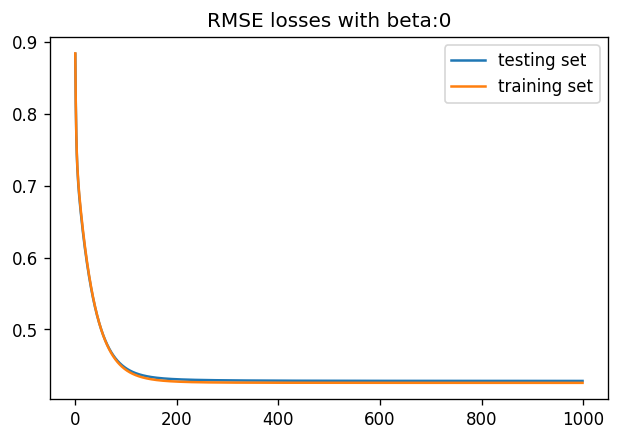

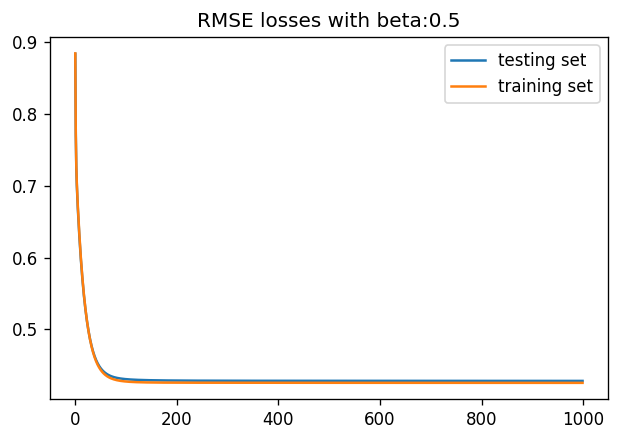

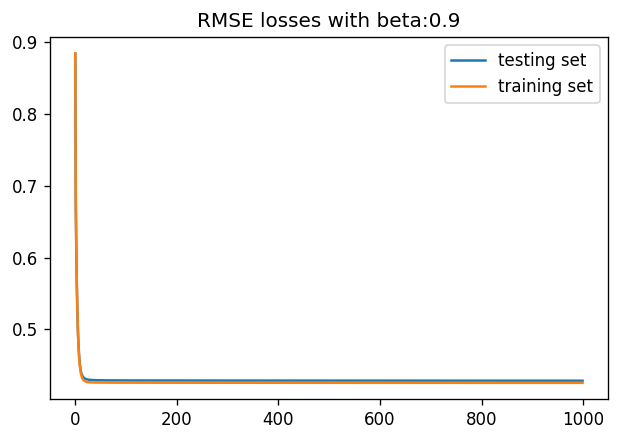

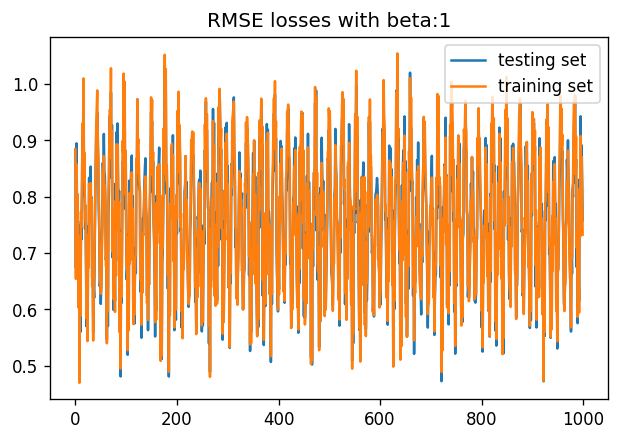

In [330]:
for beta in betas: 
  mu = beta
  N = float(len(y))
  batch_size = 100
  m_current = np.zeros((40,1))
  b_current = 0
  epochs = 1000
  mini_batch_cost = []
  learning_rate = 0.01

  costs = []
  training_rmse_losses= []
  test_rmse_losses=[]
  for i in range(epochs):
    for j in range(0, int(N), batch_size):
        #print(m_current)
        y_current =  np.dot(X[j:j+batch_size],m_current) + b_current
        mini_batch_cost.append(sum([data**2 for data in (y[j:j+batch_size] - y_current)]) / N)

        m_gradient = -(2/N) * np.dot(X[j:j+batch_size].T, (y[j:j+batch_size] - y_current))
        b_gradient = -(2/N) * sum(y[j:j+batch_size] - y_current)

        if i == 0:
            v_m = 0
            v_b = 0

        v_m = mu * v_m + learning_rate * m_gradient
        v_b = mu * v_b + learning_rate * b_gradient

        m_current = m_current - v_m
        b_current = b_current - v_b        

    cost = sum(mini_batch_cost) / float(len(mini_batch_cost))
    costs.append(cost)
    mini_batch_cost = []

    y_pred_train_momentum = np.dot(X_train_scaled_np, m_current)
    training_rmse_loss = rmse(y_pred_train_momentum, y_train_scaled_np)
    training_rmse_losses.append(training_rmse_loss)

    y_pred_test_momentum = np.dot(X_test_scaled_np, m_current)
    test_rmse_loss = rmse(y_pred_test_momentum, y_test_scaled_np)
    test_rmse_losses.append(test_rmse_loss)


  # plt.plot(costs)
  # plt.xlabel("Num iterations")
  # plt.ylabel("Loss")
  # plt.title("Loss function with momentum beta:{}".format(mu))


  plt.plot(test_rmse_losses, label='testing set')
  plt.plot(training_rmse_losses, label='training set')
  plt.title("RMSE losses with beta:{}".format(beta))
  plt.legend()
  plt.show()
  

## Part 8 - Find a dataset online [3 marks]


Find a dataset online and train a linear model with the techniques you learned 

1.   List item
2.   List item

to make a prediction. 

*   Introduce your dataset,
*   How did you train your model,
*   Show your results.

Hint: you can find various datasets in here: https://www.kaggle.com/datasets.

To use a dataset in Colab, you can upload it in your Google drive and access it in Colab ([help here](https://medium.com/analytics-vidhya/how-to-fetch-kaggle-datasets-into-google-colab-ea682569851a)), or you can download the dataset on your local machine and upload it directly to Colab using the following script.

```
from google.colab import files
uploaded = files.upload()
```

When submitting your project on Quercus, Please make sure you are also uploading your dataset so we can fully run your notebook.






In [191]:
url = 'https://raw.githubusercontent.com/armandordorica/APS1070_A4_Linear_Regression_Gradient_Descent/master/housing.csv'
housing_df = pd.read_csv(url)
housing_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


<function seaborn.utils.despine>

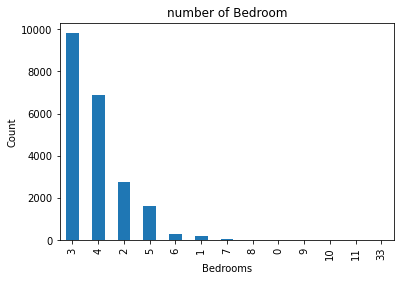

In [192]:
housing_df['bedrooms'].value_counts().plot(kind='bar')
plt.title('number of Bedroom')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x720 with 0 Axes>

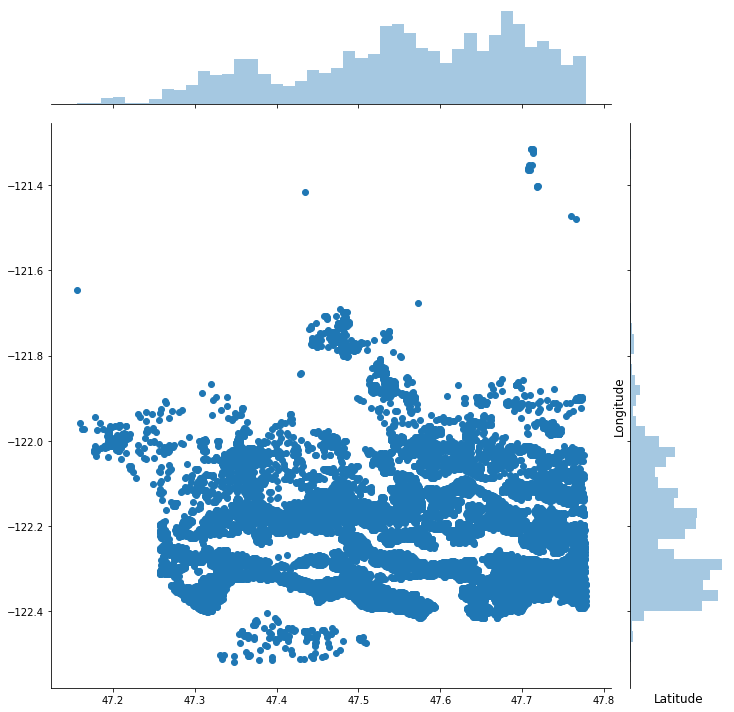

<function seaborn.utils.despine>

In [193]:
plt.figure(figsize=(10,10))
sns.jointplot(x=housing_df.lat.values, y=housing_df.long.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()
sns.despine

Text(0.5, 1.0, 'Price vs Square Feet')

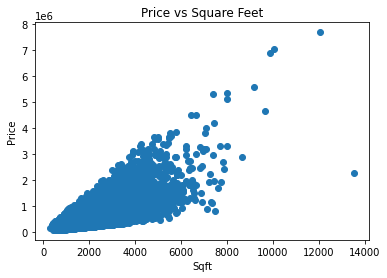

In [194]:
plt.scatter(housing_df.sqft_living, housing_df.price)
plt.xlabel("Sqft")
plt.ylabel("Price")
plt.title("Price vs Square Feet")

Text(0.5, 1.0, 'Price vs Square Feet')

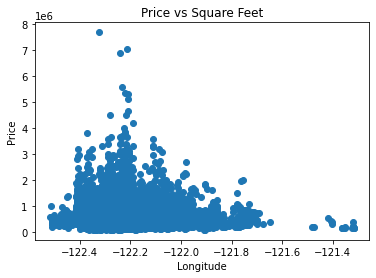

In [195]:
plt.scatter(housing_df.long, housing_df.price)
plt.xlabel("Longitude")
plt.ylabel("Price")
plt.title("Price vs Square Feet")

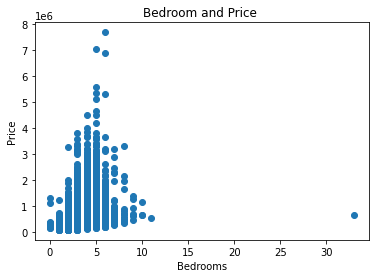

<function seaborn.utils.despine>

In [196]:
plt.scatter(housing_df.bedrooms,housing_df.price)
plt.title("Bedroom and Price ")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()
sns.despine

In [197]:
housing_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


### Splitting dataset between Training and Testing

In [198]:
list(housing_df.columns)

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [199]:
X_cols_housing = [
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [200]:
target_housing = ['price']

In [201]:
X_housing = housing_df[X_cols_housing]
y_housing = housing_df[target_housing]


In [164]:
X_housing

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [165]:
y_housing

,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0
...,...
21608,360000.0
21609,400000.0
21610,402101.0
21611,400000.0


In [166]:
from sklearn.model_selection import train_test_split

X_train_housing, X_test_housing, y_train_housing, y_test_housing = train_test_split(X_housing, y_housing, test_size=0.20, random_state=41)
X_train_housing, X_test_housing, y_train_housing, y_test_housing 

(       bedrooms  bathrooms  sqft_living  ...     long  sqft_living15  sqft_lot15
 3257          4       3.75         2930  ... -122.359           1900        4320
 1365          4       1.75         1960  ... -121.772           1500        9752
 17139         4       2.50         2750  ... -121.972           2500       14564
 6651          2       1.00          770  ... -122.087           1150        5330
 15685         3       1.00         1010  ... -122.144           1510        9600
 ...         ...        ...          ...  ...      ...            ...         ...
 8513          4       1.75         2160  ... -122.382           2350        8200
 21584         3       2.50         1260  ... -122.384           1310        1415
 20450         4       2.50         2650  ... -122.018           2640        5099
 931           5       2.50         2520  ... -122.199           2030        8580
 1984          3       1.00         1990  ... -122.213           1320        7245
 
 [17290 rows x

In [167]:
len(X_housing), len(X_train_housing), len(X_test_housing)

(21613, 17290, 4323)

### Scaling the data

One should first split between train and test and then fit the scaler only on the training set and then use the same transform and apply it to the test data. 

If the scaler is used on the full dataset before it is split into training and testing groups you are influencing the distribution of the dataset, meaning you can influence how you detect and process outliers, as well as how you parametrize your model. Even if the data itself is not modified, the distribution would be. This would cause the performance of the test set not to be a true estimate of the performance of unseen data. 

In [168]:
scaler = StandardScaler()

In [169]:
training_set = X_train_housing.copy(deep=True)
training_set['price']= y_train_housing


test_set = X_test_housing.copy(deep=True)
test_set['price']= y_test_housing

In [170]:
scaler.fit(training_set)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [171]:
training_set_scaled = scaler.transform(training_set)
test_set_scaled = scaler.transform(test_set)

In [172]:
training_set_scaled_df = pd.DataFrame(training_set_scaled, index=training_set.index, columns=training_set.columns)
test_set_scaled_df = pd.DataFrame(test_set_scaled, index=test_set.index, columns=test_set.columns)

In [173]:
X_train_housing_scaled_df = training_set_scaled_df[X_cols_housing]
y_train_housing_scaled_df = training_set_scaled_df[target_housing]

X_train_housing_scaled_np = np.array(X_train_housing_scaled_df)
y_train_housing_scaled_np = np.array(y_train_housing_scaled_df)


X_test_housing_scaled_df = test_set_scaled_df[X_cols_housing]
y_test_housing_scaled_df = test_set_scaled_df[target_housing]

X_test_housing_scaled_np = np.array(X_test_housing_scaled_df)
y_test_housing_scaled_np = np.array(y_test_housing_scaled_df)

In [174]:
num_features = len(X_train_housing_scaled_df.columns)

In [175]:
training_set_size = len(X_train_housing_scaled_df)

### Gradient descent

**1. We initialize `w` to be a vector of zeros and `b` to be a vector of `1`s**

* NOTE: Actually, because our data is already scaled and centered at zero, we will ignore the bias term by adding "zeros" because otherwise the RMSE asymptotes at 1. 

In [176]:
w_init_grad_desc = np.zeros((num_features,1))
b = np.zeros((training_set_size,1))
alpha = 0.001
N = training_set_size
rmses_gd = []

**2. We obtain `y_gd_pred_scaled_np`, where `gd` stands for "gradient descent" by `y_gd_pred_scaled_np`= `X_train_scaled_np` $\cdot$ `w_init_grad_desc` + `b`**

In [177]:
y_gd_pred_train_scaled_np = np.dot(X_train_housing_scaled_np, w_init_grad_desc) + b
y_gd_pred_train_scaled_np

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

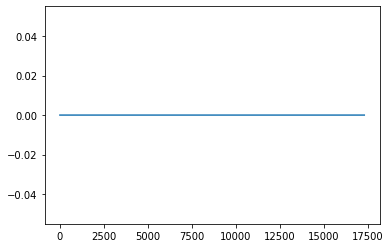

In [178]:
plt.plot(y_gd_pred_train_scaled_np)

In [179]:
rmse(y_gd_pred_train_scaled_np, y_train_housing_scaled_np)

1.0

**Now we update the weight vector using the update rule $$w \leftarrow w - \frac{\alpha}{N}X^T(y-t)$$**

In [180]:
w_init_grad_desc = w_init_grad_desc - alpha/N * np.dot(X_train_housing_scaled_np.T,(y_gd_pred_train_scaled_np-y_train_housing_scaled_np))

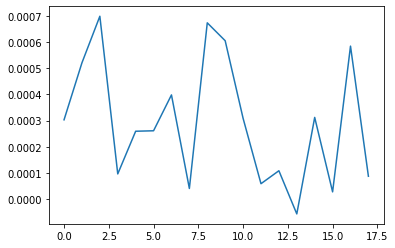

In [181]:
plt.plot(w_init_grad_desc)

**After we apply the update rule, we try `y` again and check for the `RMSE` value that it yields**

In [182]:
y_gd_pred_train_scaled_np = np.dot(X_train_housing_scaled_np, w_init_grad_desc) + b
rmses_gd.append(rmse(y_gd_pred_train_scaled_np, y_train_housing_scaled_np))

In [183]:
rmses_gd

[0.9974678247253558]

### Training the gradient descent with 10,000 epochs 

In [184]:
rmses_gd_test = []
for i in range(0,10000): 
  w_init_grad_desc = w_init_grad_desc - alpha/N * np.dot(X_train_housing_scaled_np.T,(y_gd_pred_train_scaled_np-y_train_housing_scaled_np))
  y_gd_pred_train_scaled_np = np.dot(X_train_housing_scaled_np, w_init_grad_desc) + b
  rmse_loss = rmse(y_gd_pred_train_scaled_np, y_train_housing_scaled_np)
  rmses_gd.append(rmse_loss)

  y_gd_pred_test_scaled_np = np.dot(X_test_housing_scaled_np, w_init_grad_desc)
  rmses_gd_test.append(rmse(y_gd_pred_test_scaled_np, y_test_housing_scaled_np))

Text(0.5, 1.0, 'RMSE Loss')

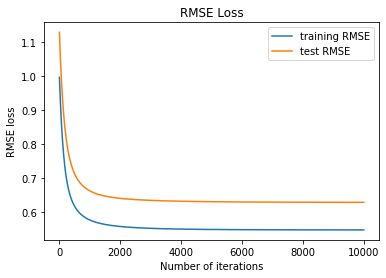

In [185]:
plt.plot(rmses_gd, label='training RMSE')
plt.plot(rmses_gd_test, label='test RMSE')
plt.xlabel("Number of iterations")
plt.ylabel("RMSE loss")

plt.legend()
plt.title("RMSE Loss")

### **Showing how predicted and true values compare for the training set for random segments**

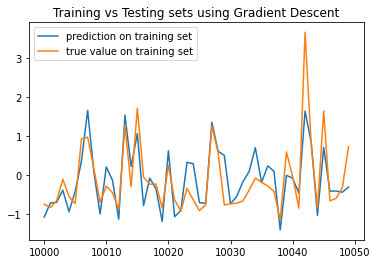

In [186]:
initial_value = 10000
end_value = 10050

plt.plot(np.arange(initial_value, end_value), y_gd_pred_train_scaled_np[initial_value:end_value], label='prediction on training set')
plt.plot(np.arange(initial_value, end_value), y_train_housing_scaled_np[initial_value:end_value], label='true value on training set')
plt.title("Training vs Testing sets using Gradient Descent")
plt.legend()

### **We will compute the loss on the testing set by multiplying the fitted weight vector with the `X_train` set.**

In [187]:
y_gd_pred_test_scaled_np = np.dot(X_test_housing_scaled_np, w_init_grad_desc)
rmse(y_gd_pred_test_scaled_np, y_test_housing_scaled_np)

0.62845571514499

In [188]:
np.dot(X_train_housing_scaled_np, w_init_grad_desc) + b

rmse(y_gd_pred_train_scaled_np, y_train_housing_scaled_np)

0.5470868053522997

### Trying with a different learning rate to see if we can decrease the testing error 

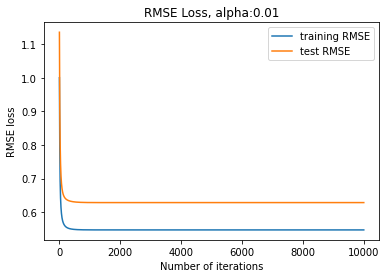

In [189]:
w_init_grad_desc = np.zeros((num_features,1))
b = np.zeros((training_set_size,1))
alpha = 0.01
N = training_set_size
rmses_gd = []
rmses_gd_test = []


for i in range(0,10000): 
  w_init_grad_desc = w_init_grad_desc - alpha/N * np.dot(X_train_housing_scaled_np.T,(y_gd_pred_train_scaled_np-y_train_housing_scaled_np))
  y_gd_pred_train_scaled_np = np.dot(X_train_housing_scaled_np, w_init_grad_desc) + b
  rmse_loss = rmse(y_gd_pred_train_scaled_np, y_train_housing_scaled_np)
  rmses_gd.append(rmse_loss)

  y_gd_pred_test_scaled_np = np.dot(X_test_housing_scaled_np, w_init_grad_desc)
  rmses_gd_test.append(rmse(y_gd_pred_test_scaled_np, y_test_housing_scaled_np))

plt.plot(rmses_gd, label='training RMSE')
plt.plot(rmses_gd_test, label='test RMSE')
plt.xlabel("Number of iterations")
plt.ylabel("RMSE loss")

plt.title("RMSE Loss, alpha:{}".format(alpha))
plt.legend()

In [190]:
y_gd_pred_test_scaled_np = np.dot(X_test_housing_scaled_np, w_init_grad_desc)
rmse(y_gd_pred_test_scaled_np, y_test_housing_scaled_np)

0.628350745205754